In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy import units as u
from matplotlib import rcParams

In [3]:
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=False
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [4]:
dat=pd.read_csv('map1.csv',na_values='cal')

In [5]:
def conv(ra_hr,ra_min,ra_s):
    ra=ra_hr
    ra+=ra_min/60.
    ra+=ra_s/60./60.
    return ra

ras=conv(dat['ra_hr'],dat['ra_min'],dat['ra_sec'])
decs=dat['dec']
fds=dat['flux_den']*500./36.

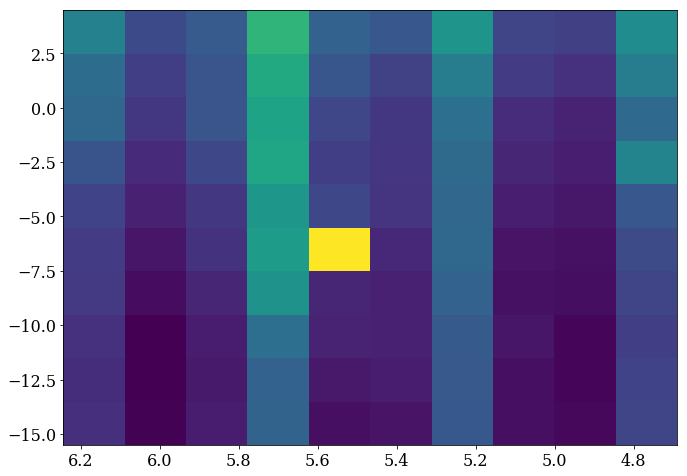

In [6]:
fig=plt.figure(figsize=(11,8))
ax=fig.add_subplot(111)
counts, xedges, yedges, im=ax.hist2d(ras,decs,weights=fds)
ax.invert_xaxis()
#plt.colorbar(im, ax=ax)
plt.show()

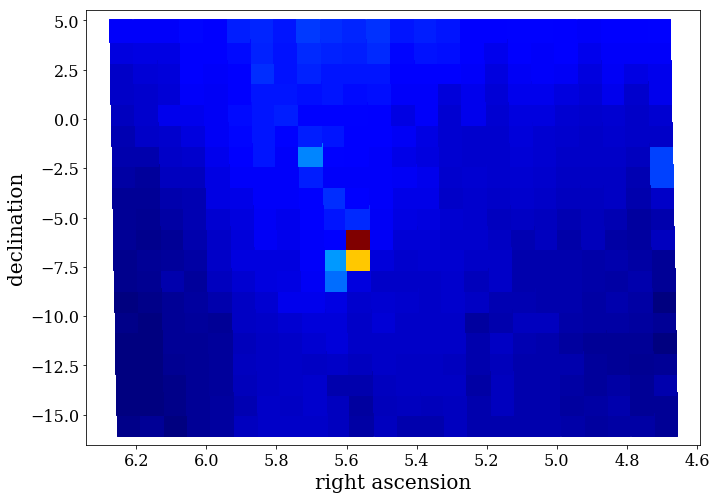

In [9]:
fig = plt.figure(figsize=(11,8))
ax=fig.add_subplot(111)
ax.scatter(ras,decs,c=fds,s=540,marker='s',cmap='jet')
ax.set_ylabel('declination')
ax.invert_xaxis()
ax.set_xlabel('right ascension')
plt.show()

In [12]:
np.savetxt('out.csv',zip(ras,decs,fds),delimiter=',')